# Examples

In [2]:
%load_ext autoreload
%autoreload 2

from waze import Waze, Coordinate, Countries

# initialize the client
waze = Waze(locale=Countries.MY, log_level="verbose")

# example inputs

# SG
star_vista = Coordinate(name="Star Vista", latitude=1.3068, longitude=103.7884)
tuas = Coordinate(name="Tuas Checkpoint", latitude=1.336450, longitude=103.647072)

# MY
kajang = Coordinate(name="Kajang", latitude=2.993518, longitude=101.787407)
georgetown = Coordinate(name="Georgetown", latitude=5.416393, longitude=100.332680)
subang_parade = Coordinate(name="Subang Parade", latitude=3.0815, longitude=101.5851)

### Traffic

In [3]:
plan = waze.plan(src=star_vista, dst=subang_parade)

[INFO] [plan] Making request with the following parameters:
{'from': {'name': 'Star Vista', 'y': 1.3068, 'x': 103.7884}, 'to': {'name': 'Subang Parade', 'y': 3.0815, 'x': 101.5851}, 'nPaths': 1, 'useCase': 'LIVEMAP_PLANNING', 'interval': 100, 'arriveAt': True}


In [4]:
hr = plan.totalSeconds / 60 / 60
distance = plan.totalLength / 1000

print(f"Route: {plan.src.name} => {plan.dst.name} , {plan.routeName}")
print(f"Distance: {distance} km")
print(f"Estimated Travel Time: {int(hr)} hours and {(hr - int(hr)) * 60:.0f} minutes")
print(f"Toll : {plan.isToll}")
print(f"Fastest Route: {plan.isFastest}")
print(f"Toll Price : RM{plan.tollPriceInfo.tollPrice}")

Route: Star Vista => Subang Parade , E2 Lebuhraya Utara Selatan Simpang Renggam
Distance: 368.387 km
Estimated Travel Time: 4 hours and 0 minutes
Toll : True
Fastest Route: True
Toll Price : RM44.59


### Geocoding

Setting a locale when initializing the `Waze` object is necessary for this feature.  

A bounding box around the `locale` will be computed, where priority in search will be given for places within the bounding box.

In [6]:
locs = waze.geocode("Subang Parade")
locs

[INFO] [geocode] Making request with the following parameters:
{'q': 'Subang Parade', 'v': '3.3111624,101.0740106;5.1098056,102.8775214', 'exp': '8,10,12', 'geo-env': 'row', 'lang': 'en'}


[WazeLocation(address='Jalan SS 16/1, Subang Jaya', cleanName='Subang Parade', latLng=Coordinate(name=None, latitude=3.08223, longitude=101.58553049999999), name='Subang Parade', venueId='venues.66584607.665780532.295876'),
 WazeLocation(address='Jalan UKP4, Taman, Ukay Perdana, Ampang Jaya, Selangor, Malaysia', cleanName='Subang Parade', latLng=Coordinate(name=None, latitude=3.2030708, longitude=101.7748039), name='Subang Parade', venueId='googlePlaces.ChIJj7vkrPI5zDERujgYuIVmrYI'),
 WazeLocation(address='Jalan SS 16/1, Ss 16, Subang Jaya, Selangor, Malaysia', cleanName='Subang Parade loading bay', latLng=Coordinate(name=None, latitude=3.0834561999999996, longitude=101.58643479999999), name='Subang Parade loading bay', venueId='googlePlaces.ChIJi8csKwBNzDERo4XoKEvek7w'),
 WazeLocation(address='Lot F30, 32 & 33A, Subang Parade, Ss 16, Subang Jaya, Selangor, Malaysia', cleanName='GSC Subang Parade', latLng=Coordinate(name=None, latitude=3.0828170000000004, longitude=101.5859985), name='

### Venue Information

In [7]:
# from the above example
loc = locs[0]
venue = waze.venue(loc)
venue

WazeVenue(geoEnv='row', latLng=Coordinate(name=None, latitude=3.08223, longitude=101.585530474), id='venues.66584607.665780532.295876', address=WazeVenueAddress(countryCode='MY', countryName='Malaysia', state=None, city='Subang Jaya', cityId=29698, street='Jalan SS 16/1', streetId=11507758, segmentId=None, houseNumber=5), name='Subang Parade', phone=WazeVenueLink(href='tel:03-5032 9778', text='03-5032 9778'), url=WazeVenueLink(href='https://www.subangparade.com.my', text='www.subangparade.com.my'), services=['restrooms', 'vallet_service', 'parking_for_customers', 'air_conditioning', 'credit_cards', 'wheelchair_accessible'], lastUpdateDate=1718640507162, creationDate=1265125609000, images=None, hours=[WazeVenueHours(day=0, from_=TimeUnit(hours=10, minutes=0), to=TimeUnit(hours=22, minutes=0)), WazeVenueHours(day=1, from_=TimeUnit(hours=10, minutes=0), to=TimeUnit(hours=22, minutes=0)), WazeVenueHours(day=2, from_=TimeUnit(hours=10, minutes=0), to=TimeUnit(hours=22, minutes=0)), WazeVenu

In [8]:
venue.model_dump()

{'geoEnv': 'row',
 'latLng': {'name': None, 'latitude': 3.08223, 'longitude': 101.585530474},
 'id': 'venues.66584607.665780532.295876',
 'address': {'countryCode': 'MY',
  'countryName': 'Malaysia',
  'state': None,
  'city': 'Subang Jaya',
  'cityId': 29698,
  'street': 'Jalan SS 16/1',
  'streetId': 11507758,
  'segmentId': None,
  'houseNumber': 5},
 'name': 'Subang Parade',
 'phone': {'href': 'tel:03-5032 9778', 'text': '03-5032 9778'},
 'url': {'href': 'https://www.subangparade.com.my',
  'text': 'www.subangparade.com.my'},
 'services': ['restrooms',
  'vallet_service',
  'parking_for_customers',
  'air_conditioning',
  'credit_cards',
  'wheelchair_accessible'],
 'lastUpdateDate': 1718640507162,
 'creationDate': 1265125609000,
 'images': None,
 'hours': [{'day': 0,
   'from_': {'hours': 10, 'minutes': 0},
   'to': {'hours': 22, 'minutes': 0}},
  {'day': 1,
   'from_': {'hours': 10, 'minutes': 0},
   'to': {'hours': 22, 'minutes': 0}},
  {'day': 2,
   'from_': {'hours': 10, 'minu

In [8]:
reviews = waze.reviews(venue)
reviews

WazeReview(reviews=[Review(author_name='Marion', author_url='https://www.google.com/maps/contrib/102445708832929035219', profile_photo_url='https://lh3.googleusercontent.com/a-/ALV-UjX1S9ERQ_K3Z_k9I_FXfj3XmMSJYgy4twG6qDWmMqFGB2epwH0g', rating=100, relative_time_description='', text="First time at Jibril and food was great! Really recommend their butter chicken, and was not disappointed. Very creamy and just enough kick. Best part of experience was having a great server, Michael! He's really friendly and made the experience great! Thank you!", time=1666164057688), Review(author_name='Hid Dal', author_url='https://www.google.com/maps/contrib/110139212602179235162', profile_photo_url='https://lh3.googleusercontent.com/a-/ALV-UjUwpM-dVuriVKQxeX6M8W0FA6UdgKxznQ-eiwzYOeFK6N8p1Sg', rating=80, relative_time_description='', text='Ordered salted butter chicken and fish, and both were awesome. Please add cucumber / tomato.\n\nAnd the ambience too dark, make it brighter please. Something could jum

In [12]:
reviews.model_dump()

{'reviews': [{'author_name': 'Marion',
   'author_url': 'https://www.google.com/maps/contrib/102445708832929035219',
   'profile_photo_url': 'https://lh3.googleusercontent.com/a-/ALV-UjX1S9ERQ_K3Z_k9I_FXfj3XmMSJYgy4twG6qDWmMqFGB2epwH0g',
   'rating': 100,
   'relative_time_description': '',
   'text': "First time at Jibril and food was great! Really recommend their butter chicken, and was not disappointed. Very creamy and just enough kick. Best part of experience was having a great server, Michael! He's really friendly and made the experience great! Thank you!",
   'time': 1666164057688},
  {'author_name': 'Hid Dal',
   'author_url': 'https://www.google.com/maps/contrib/110139212602179235162',
   'profile_photo_url': 'https://lh3.googleusercontent.com/a-/ALV-UjUwpM-dVuriVKQxeX6M8W0FA6UdgKxznQ-eiwzYOeFK6N8p1Sg',
   'rating': 80,
   'relative_time_description': '',
   'text': 'Ordered salted butter chicken and fish, and both were awesome. Please add cucumber / tomato.\n\nAnd the ambience

# More Examples

### **[Extras]** Visualizing Routes

With a sufficiently large dataset, we can do cool things like

- show how the optimal/fastest route changes over time
- plot hot spots of reported incidents/accidents along popular routes via polygon counting or k-means clustering


In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

geom = gpd.read_file(
    "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/administrative_1_state.geojson"
).query("state != 'Sarawak' and state != 'Sabah' and state != 'W.P. Labuan'")

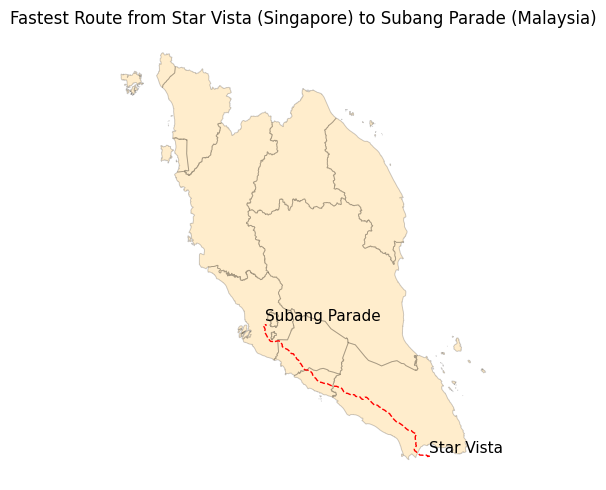

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis("off")

route = LineString([[o.latitude, o.longitude] for o in plan.geoPath])

TEXT_DISPLAY_KWARGS = dict(
    ha="left",
    va="bottom",
    fontsize=11,
    color="black",
)

geom.plot(ax=ax, edgecolor="black", color="orange", linewidth=0.7, alpha=0.2)
ax.plot(*route.xy[::-1], "r--", linewidth=1)
ax.text(plan.src.longitude, plan.src.latitude, plan.src.name, **TEXT_DISPLAY_KWARGS)
ax.text(plan.dst.longitude, plan.dst.latitude, plan.dst.name, **TEXT_DISPLAY_KWARGS)
ax.set_title("Fastest Route from Star Vista (Singapore) to Subang Parade (Malaysia)")
fig.tight_layout()